In [1]:
from utility.types import AllocationMethodsEnum
from data.universe import Universe
from backtest.backtest import Backtester

In [2]:
universe_obj = Universe(
    index_universe="RTY Index", start_date="2019-01-01", end_date="2022-01-01"
)

In [3]:
bk_test = Backtester(universe_obj=universe_obj)

Backtesting portfolio...:   0%|          | 0/783 [00:00<?, ?it/s]


-------  Returns statistical information  --------
Overall performance: -30.10 % vs 52.59 % (benchmark)
Expected return annualized: -2.33 % vs 18.17 % (benchmark)
CAGR: -11.46 % vs 14.58 % (benchmark)
Expected volatility annualized: 43.39 % vs 28.82 % (benchmark)
Expected volatility monthly: 12.53 % vs 8.32 % (benchmark)
Expected volatility daily: 2.73 % vs 1.82 % (benchmark)
Specific volatility (diversifiable) annualized: 31.10 %
Systematic volatility annualized: 30.26 %
Skewness: -0.28 vs -1.02 (benchmark), <0 = left tail, >0 = right tail
Kurtosis: 9.34 vs -1.02 (benchmark) , >3 = fat tails, <3 = thin tails
95%-VaR: -3.61 % vs -2.58 % (benchmark) -> the lower the better
95%-CVaR: -6.63 % vs -4.41 % (benchmark) -> the lower the better

-------  Strategy statistical information  -------
Max drawdown: -66.72 % vs -41.87 % (benchmark)
Kelly criterion: -0.53 % vs 6.26 % (benchmark)
Benchmark sensitivity (beta): 1.05 vs 1 (benchmark)
Determination coefficient R²: 0.49
Tracking error annua

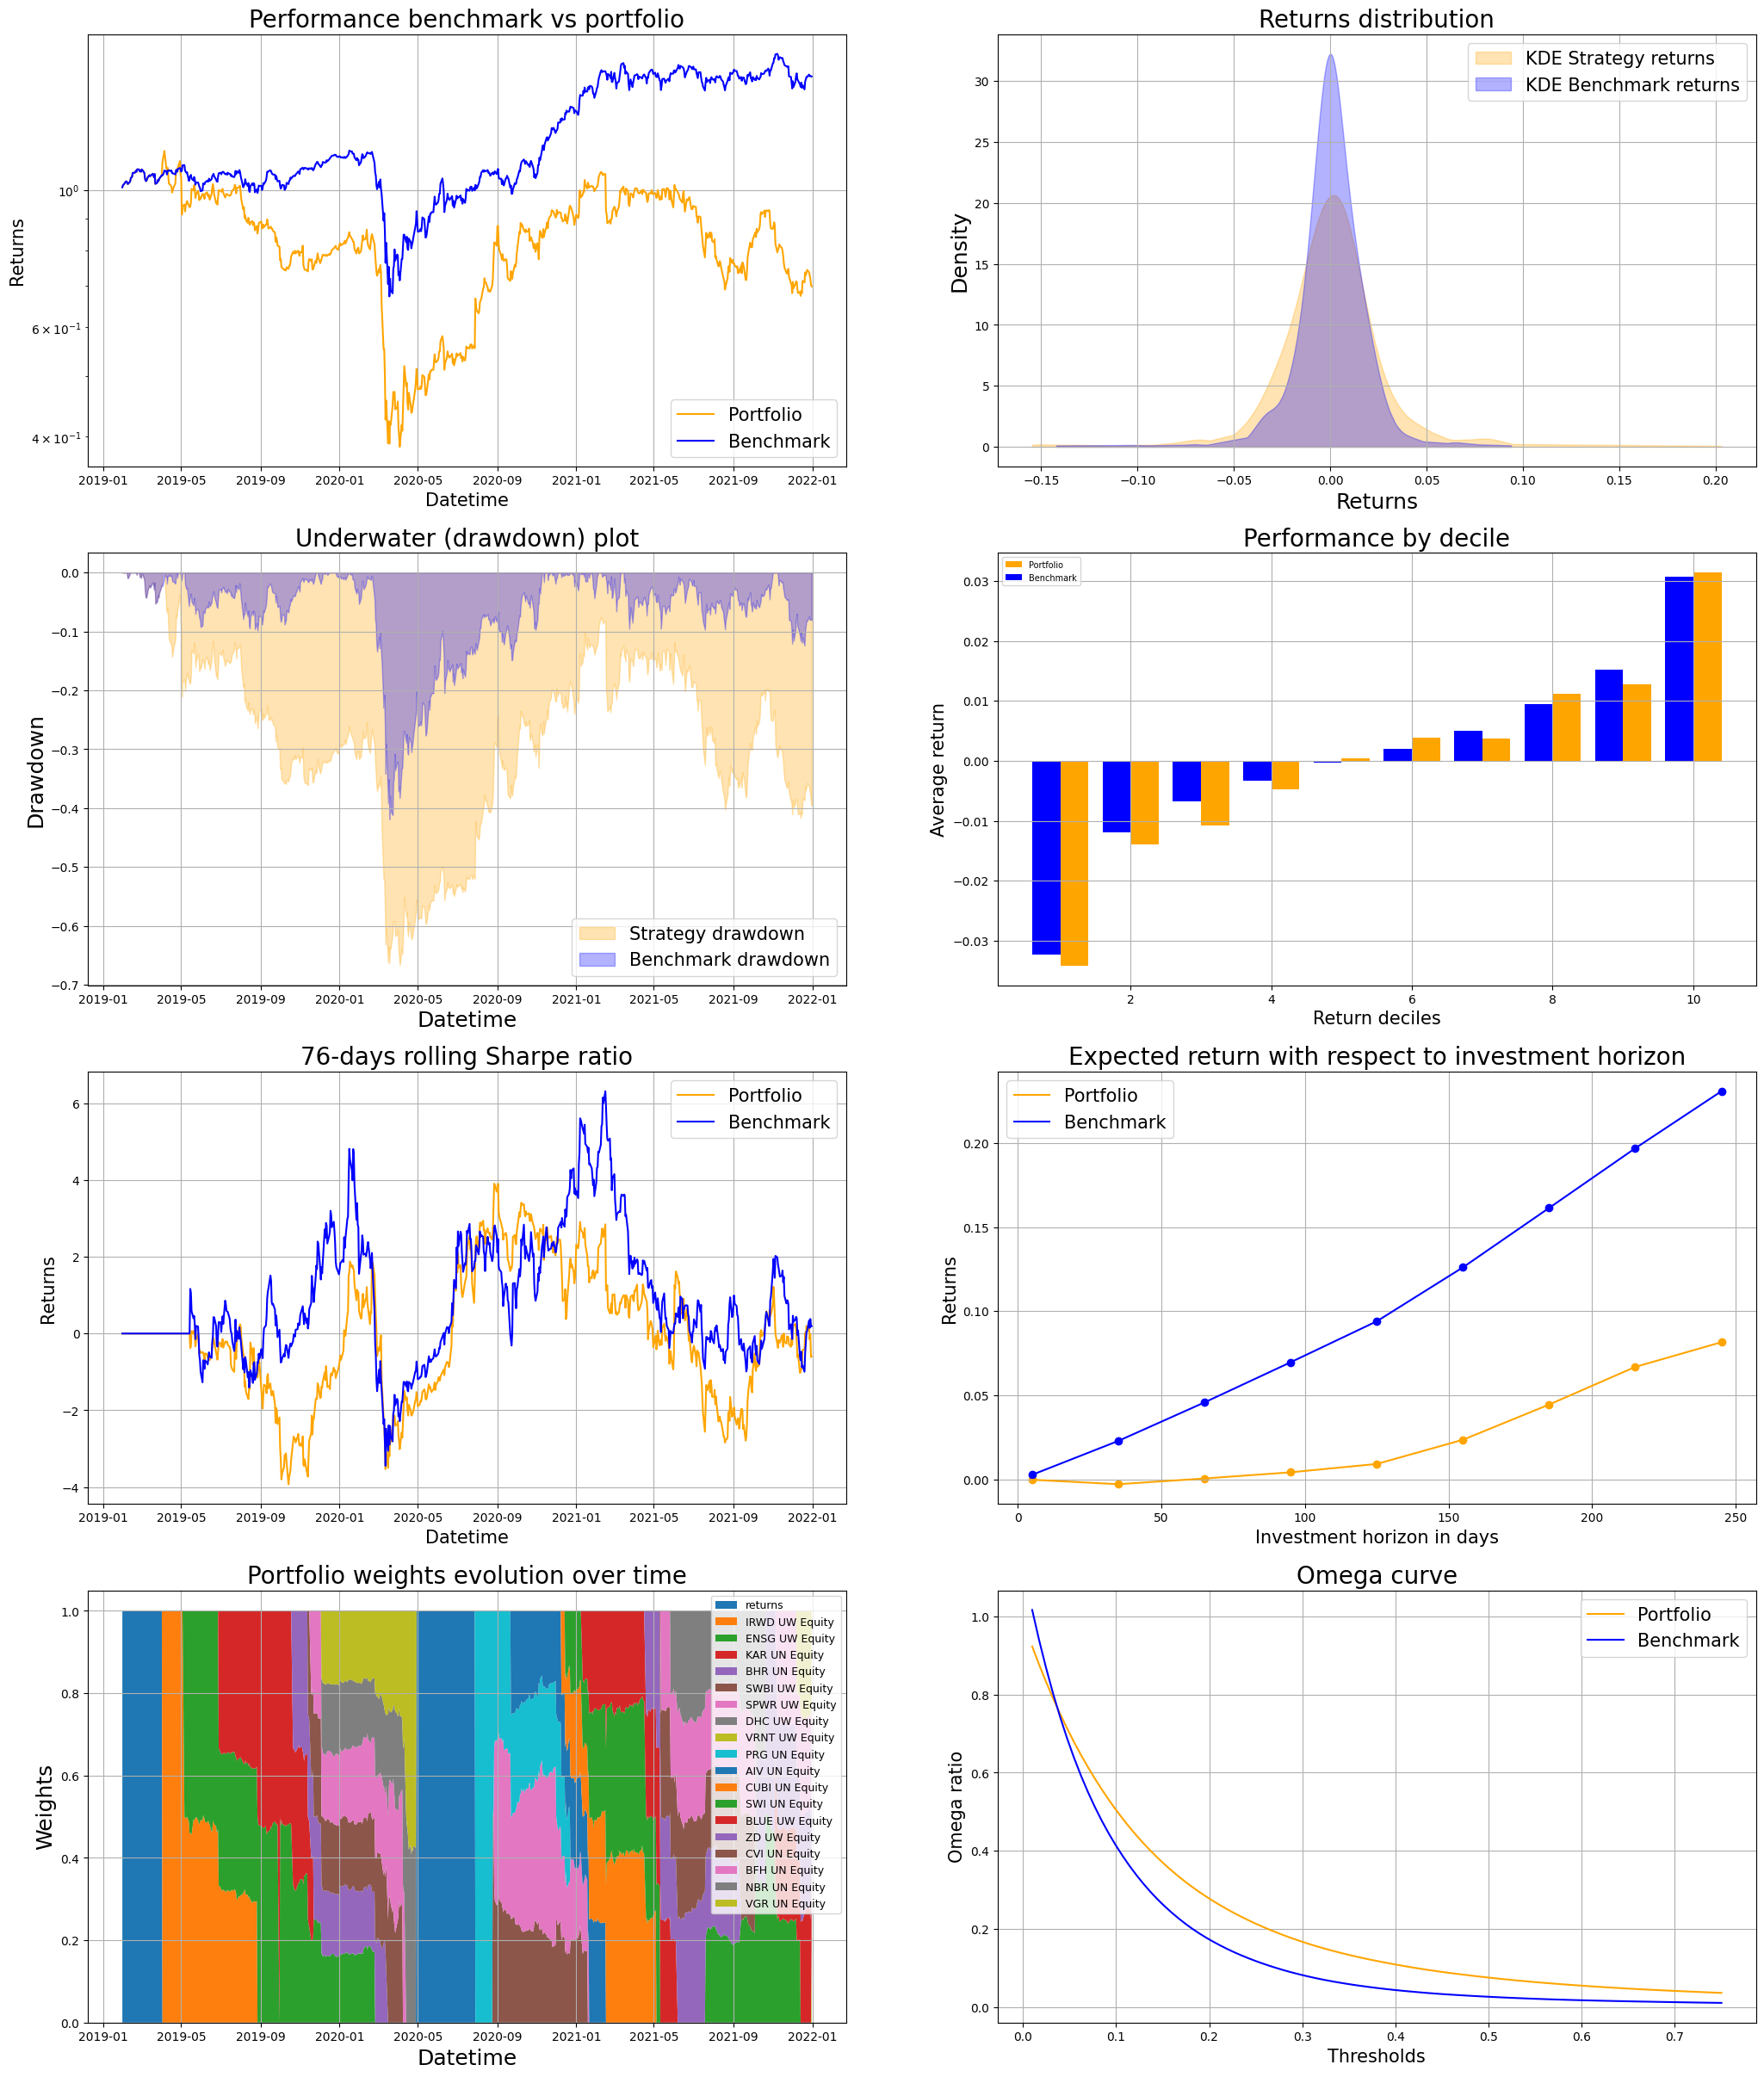

In [11]:
ptf_and_bench, ptf_weights_df, ptf_metrics_df = bk_test.run_backtest(
    allocation_type=AllocationMethodsEnum.EQUALLY_WEIGHTED,
    backtest_type="parents",
    holding_period_in_months=5,
    transaction_cost=0.001,  # 10 BP
    position_type = "long",
    plot_performance=True,
    verbose=False,
)

In [12]:
ptf_weights_df.iloc[-1]

returns           0.0
IRWD UW Equity    0.0
ENSG UW Equity    0.0
KAR UN Equity     0.0
BHR UN Equity     0.0
SWBI UW Equity    0.0
SPWR UW Equity    0.0
DHC UW Equity     0.0
VRNT UW Equity    0.2
PRG UN Equity     0.0
AIV UN Equity     0.0
CUBI UN Equity    0.0
SWI UN Equity     0.0
BLUE UW Equity    0.2
ZD UW Equity      0.2
CVI UN Equity     0.0
BFH UN Equity     0.2
NBR UN Equity     0.0
VGR UN Equity     0.2
Name: 2021-12-31 00:00:00, dtype: float64

# Parent behaviour


In [13]:
from utility.utils import wrangle_spin_off_dataframe
from backtest.analysis import get_spin_off_parent_behavior
import numpy as np

spin_off_announcement = wrangle_spin_off_dataframe(universe_obj.get_spin_off_history())
spin_off_announcement

{datetime.date(2021, 8, 16): [SpinOff(parent_company='AADI UR Equity', subsidiary_company='1912367D US Equity', spin_off_ex_date=datetime.date(2021, 8, 18))],
 datetime.date(2020, 9, 22): [SpinOff(parent_company='AIV UN Equity', subsidiary_company='AIRC US Equity', spin_off_ex_date=datetime.date(2020, 12, 15))],
 datetime.date(2021, 5, 12): [SpinOff(parent_company='BFH UN Equity', subsidiary_company='LYLTQ US Equity', spin_off_ex_date=datetime.date(2021, 11, 8))],
 datetime.date(2019, 10, 21): [SpinOff(parent_company='BHR UN Equity', subsidiary_company='AINC US Equity', spin_off_ex_date=datetime.date(2019, 10, 28))],
 datetime.date(2021, 1, 11): [SpinOff(parent_company='BLUE UW Equity', subsidiary_company='TSVT US Equity', spin_off_ex_date=datetime.date(2021, 11, 5))],
 datetime.date(2019, 7, 30): [SpinOff(parent_company='BYON UN Equity', subsidiary_company='1736453D US Equity', spin_off_ex_date=datetime.date(2020, 4, 24))],
 datetime.date(2020, 7, 6): [SpinOff(parent_company='COGT UW 

In [14]:
DAYS_BEFORE = 50
DAYS_AFTER = 50

behaviours = []

for spinoffs in spin_off_announcement.values():
    for spinoff in spinoffs:
        result = get_spin_off_parent_behavior(
            universe_obj.get_returns_history_from_spinoff(),
            spinoff,
            DAYS_BEFORE,
            DAYS_AFTER,
        )
        if result.shape[0] != 0 and result.shape[0] == DAYS_AFTER + DAYS_BEFORE:
            behaviours.append(result)

behaviours = np.array(behaviours)

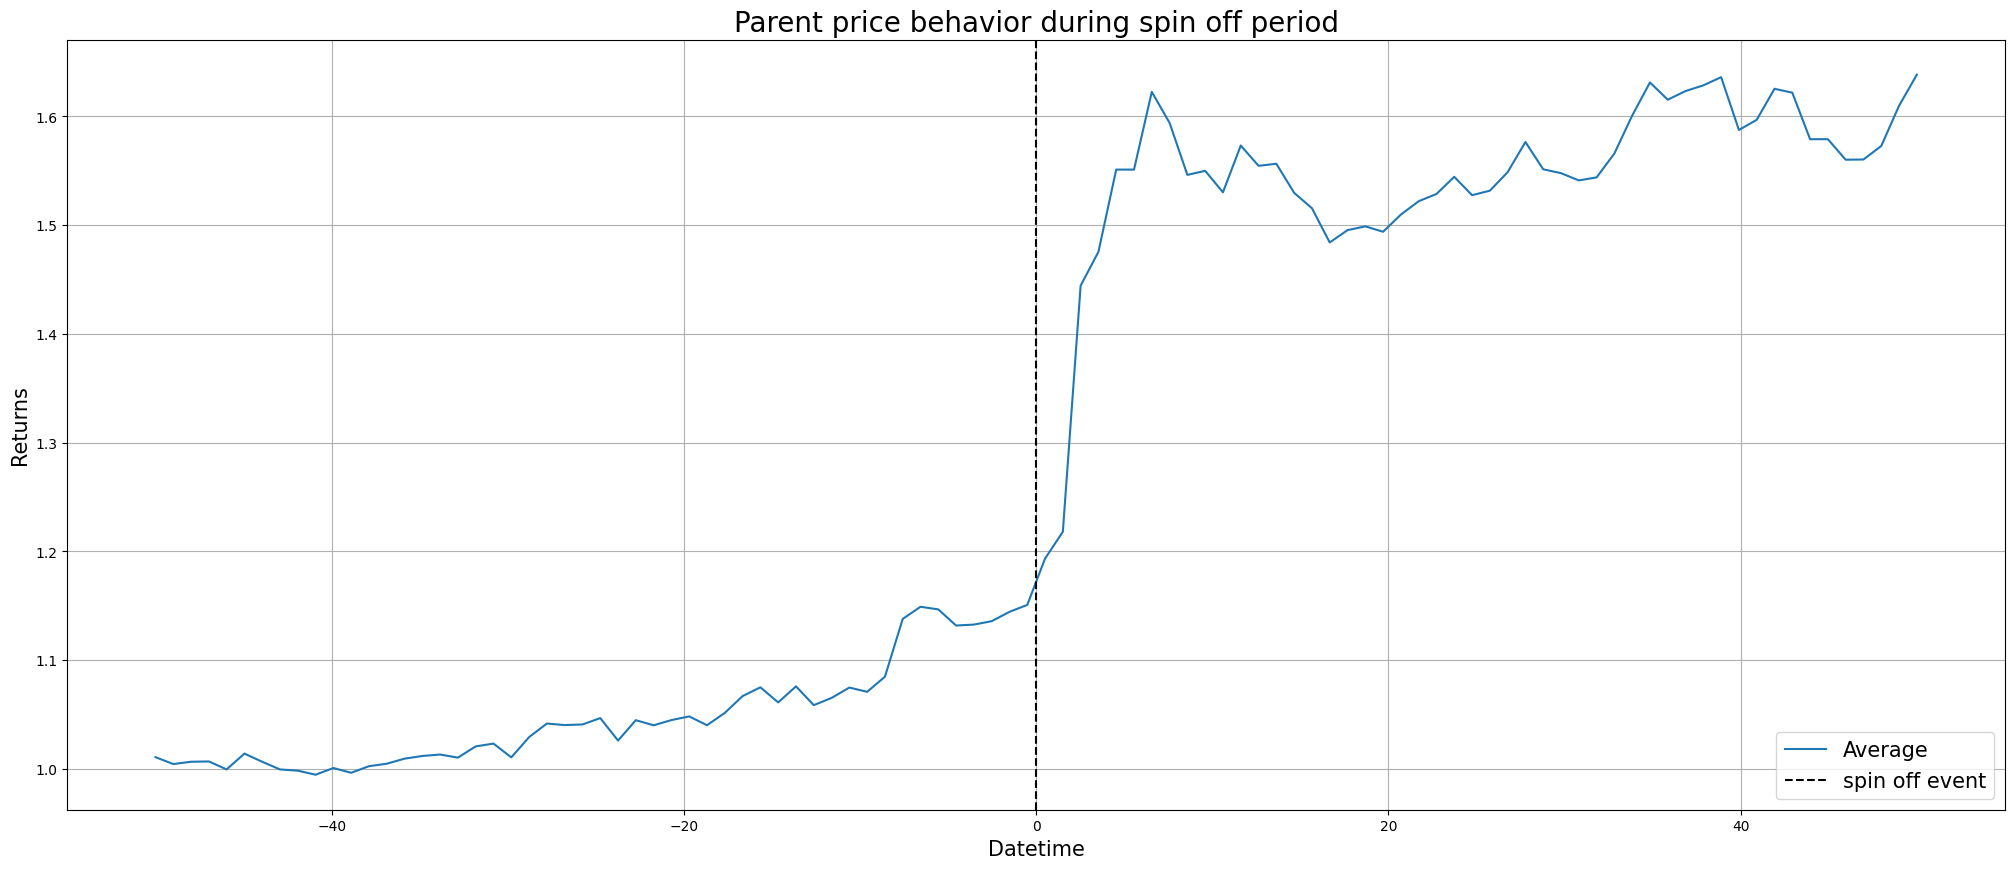

In [15]:
from matplotlib import pyplot as plt

_, ax = plt.subplots(1, 1, figsize=(25, 10))

ax.plot(
    np.linspace(-DAYS_BEFORE, DAYS_AFTER, num=DAYS_BEFORE + DAYS_AFTER),
    np.mean(behaviours, axis=0),
    label="Average",
)
ax.axvline(x=0, color="black", label="spin off event", linestyle="--")
ax.grid()
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Returns", fontsize=15)
ax.set_title(f"Parent price behavior during spin off period", fontsize=20)
ax.legend(loc="lower right", fontsize=15)